In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotting import plot_decision_regions

In [2]:
# Adaline algorithm compares the true class labels with the linear activation function's continuous valued output to compute
# model error
# key ingredient is to have an objective function, which is often the cost function that we want to minimize
# Adaline defines J to learn the weights as the Sum of Squared Erros between the calculated outcome and the true class label
# compared to the unit step function the linear activation function can be differentiable
# it is convex so we can use gradient descent to find the weights that minimize our cost function
class AdalineGD(object):

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        # learning rate
        self.eta = eta
        # number of learning iterations
        self.n_iter = n_iter
        # random state seed
        self.random_state = random_state
    
    def fit(self, X, y):
        # random number generator that we seeded with user-specified random seed
        rgen = np.random.RandomState(self.random_state)
        # generate non 0 weights from normal distribution with std 0.01
        # iff all weights would be 0 eta would only affect the scale of the weights through learning
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        # list off cost function to check on overall performance
        self.cost_ = []
        
        # go through all iterations
        for i in range(self.n_iter):
            
            # calculate net input (z)
            net_input = self.net_input(X)
            # calculate Φ based on net_input (Φ(z)) Φ(wT*x)
            output = self.activation(net_input)
            # calculate all errors
            errors = (y - output)
            # update weights -eta*gradient
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # calculate cost and append to cost list
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        # Calculates wT*x and adds the bias value, w0
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        # compute linear activation
        return X
    
    def predict(self, X):
        # Ternary operation return(self.net_input(X) >= 0) ? 1 : -1
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

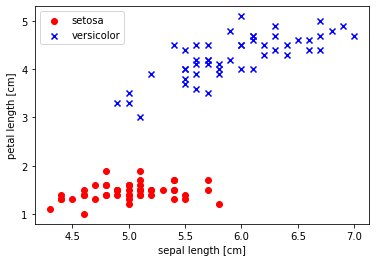

In [3]:
# load data into a pandas dataframe
# data is sorted
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# load first 100 rows and extract the class labesl
# -1 Iris-setosa
# 1 Iris-versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal and petal length X[0] = [5.1 1.4] ex.
X = df.iloc[0:100, [0, 2]].values

# plot the data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [4]:
# normalization with mean 0 and standard deviation of 1
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

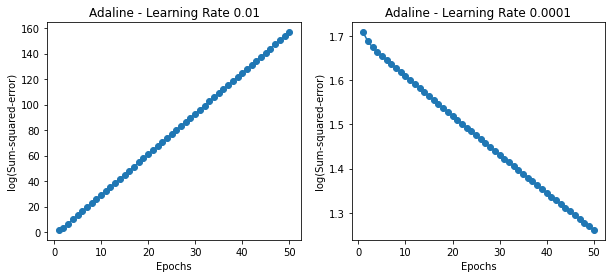

In [5]:
# create two plots each plotting out the cost of each iteration
# data without standardization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=50, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning Rate 0.01')

ada2 = AdalineGD(n_iter=50, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning Rate 0.0001')

plt.show()

(243, 312)


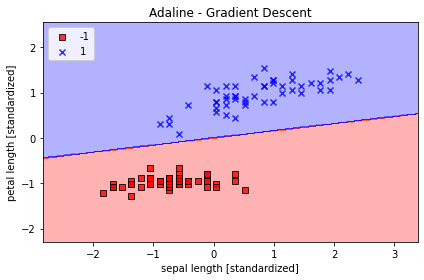

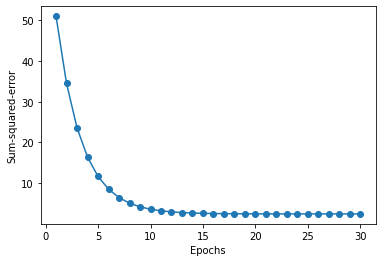

In [6]:
# data with standardization
ada = AdalineGD(n_iter=30, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()